# Project 11 -- Jazmin Pulido

**TA Help:** N/A

- Helped with...
    
**Collaboration:** N/A
    
- Helped with...

## Question 1

In [5]:
library(data.table)
monthlydepdelays <- function(year) {
    df <- fread(paste0("/anvil/projects/tdm/data/flights/subset/",year,".csv"))
    flights_ind <- subset(df, Year == year & Origin == "IND")
    avg_delays <- tapply(flights_ind$DepDelay, flights_ind$Month, mean, na.rm = TRUE)
    return(avg_delays)
}

monthlydepdelays(1990)
monthlydepdelays(1998)
monthlydepdelays(2005)


1        2        3        4        5        6        7        8 
7.282772 9.497027 6.924841 4.949858 5.471487 6.010835 4.307377 5.639782 
       9       10       11       12 
4.455586 4.473725 3.408304 9.764105

1         2         3         4         5         6         7         8 
 6.314439  5.866770  9.898317  7.766752  8.980092 15.866469  7.579602  5.765383 
        9        10        11        12 
 3.122498  5.169646  4.346535  9.228510

1         2         3         4         5         6         7         8 
 7.689248  4.956196  6.881828  2.988902  1.302440  8.472591 12.218633  6.812698 
        9        10        11        12 
 2.795146  4.850184  4.897145 11.572550

I read the flight data for a specific year using fread and paste0. Then, I filtered the data to only include flights originating from Indianapolis (IND) for that year. I used the tapply function to calculate the average departure delay for each month, ensuring that any missing values (NA) were ignored with the na.rm = TRUE parameter. The resulting average delays for each month are returned as a table.

## Question 2

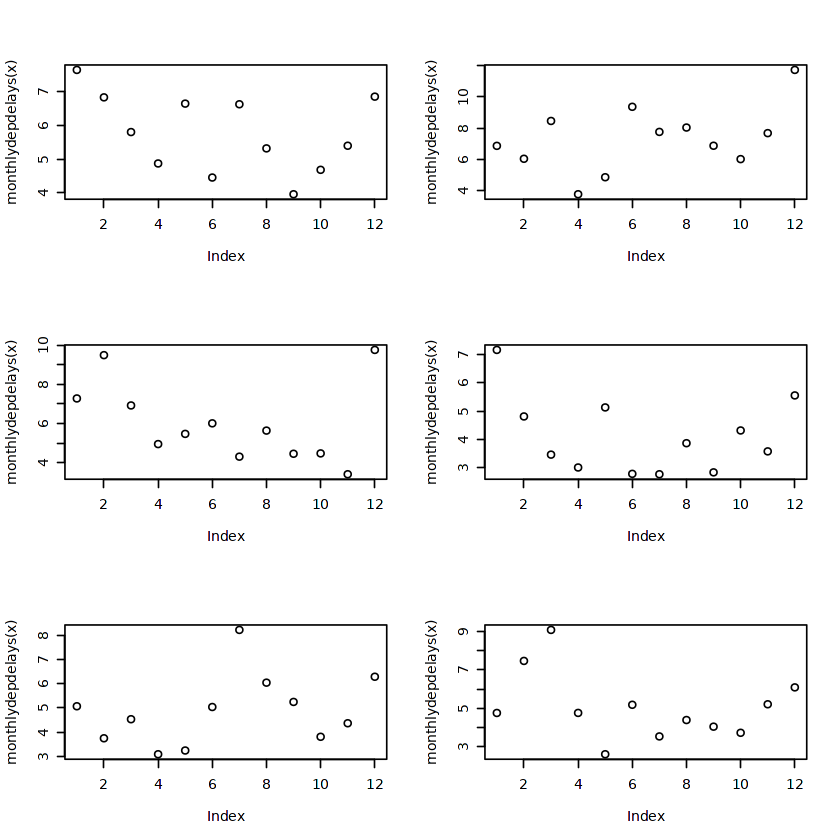

In [6]:
par(mfrow = c(3, 2))
myresults <- sapply(1988:1993, function(x) plot(monthlydepdelays(x)))



I used the par(mfrow = c(3, 2)) function to set up a 3x2 grid for the plots. Then, I applied the sapply function to generate plots for the average monthly departure delays for the years 1988 through 1993.

## Question 3

In [33]:
library(data.table) 

myindycities <- function(myyear) {
    myDF <- fread(
        paste0("/anvil/projects/tdm/data/election/itcont", myyear, ".txt"), quote = "", select = c(9, 10, 15)
    )
    names(myDF) <- c("city", "state", "donation")
    myDF <- myDF[myDF$state == "IN", ]
    city_totals <- tapply(myDF$donation, myDF$city, sum, na.rm = TRUE)
    top_cities <- sort(city_totals, decreasing = TRUE)[1:10]
    return(top_cities)
}

myindycities(1980)
myindycities(1986)
myindycities(1992)


INDIANAPOLIS       MUNCIE      ELKHART   EVANSVILLE   FORT WAYNE       CARMEL 
      753547       159897       111385        94605        87115        85872 
      INDPLS     FT WAYNE   SOUTH BEND    LAFAYETTE 
       76396        70174        68332        49851

INDIANAPOLIS   FORT WAYNE       MUNCIE      ELKHART   EVANSVILLE   SOUTH BEND 
      995379       149194       100433       100350        84815        81841 
      CARMEL  TERRE HAUTE   ZIONSVILLE     COLUMBUS 
       75993        62361        50900        40400

INDIANAPOLIS   FORT WAYNE       CARMEL   EVANSVILLE   SOUTH BEND       MUNCIE 
     2583618       524980       384683       308566       274397       251164 
     ELKHART     COLUMBUS  BLOOMINGTON   ZIONSVILLE 
      196432       143096       121733        94370

I read the file, selecting columns 9, 10, and 15 for city, state, and transaction data. I then renamed the columns to "city", "state", and "donation". After filtering the data to include only entries from the state of Indiana (IN), I used the tapply function to calculate the total donations for each city. The na.rm = TRUE argument was used to exclude any NA values when summing the donations. Finally, I sorted the cities by total donations in descending order and returned the top 10 cities for each year. I used this function to then list the totals for the different years given.

## Question 4

$`1984`
INDIANAPOLIS       MUNCIE      ELKHART   FORT WAYNE       INDPLS   SOUTH BEND 
      511935       104260        93171        80882        76520        68387 
  EVANSVILLE       CARMEL  TERRE HAUTE     FT WAYNE 
       65250        53200        52650        44665 

$`1986`
INDIANAPOLIS   FORT WAYNE       MUNCIE      ELKHART   EVANSVILLE   SOUTH BEND 
      995379       149194       100433       100350        84815        81841 
      CARMEL  TERRE HAUTE   ZIONSVILLE     COLUMBUS 
       75993        62361        50900        40400 

$`1988`
INDIANAPOLIS   FORT WAYNE   SOUTH BEND      ELKHART       MUNCIE       CARMEL 
     1231113       189037       185771       167767       156335       148438 
    COLUMBUS   EVANSVILLE   ZIONSVILLE  TERRE HAUTE 
      124308        90893        88735        77425 

$`1990`
INDIANAPOLIS   FORT WAYNE       CARMEL       MUNCIE   SOUTH BEND     COLUMBUS 
     1637113       708475       210213       206123       179821       158797 
  EVANSVILLE      ELKHART  BLOOMINGTON   ZIONSVILLE 
      156916       150274        76821        61715 

$`1992`
INDIANAPOLIS   FORT WAYNE       CARMEL   EVANSVILLE   SOUTH BEND       MUNCIE 
     2583618       524980       384683       308566       274397       251164 
     ELKHART     COLUMBUS  BLOOMINGTON   ZIONSVILLE 
      196432       143096       121733        94370 

$`1994`
INDIANAPOLIS   FORT WAYNE       CARMEL   EVANSVILLE   SOUTH BEND       MUNCIE 
     2420038       383573       355784       272368       234181       230618 
    COLUMBUS   ZIONSVILLE MERRILLVILLE  BLOOMINGTON 
      179646       108472       102443       100040

Warning message in dotchart(x):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x):
"'x' is neither a vector nor a matrix: using as.numeric(x)"
Warning message in dotchart(x):
"'x' is neither a vector nor a matrix: using as.numeric(x)"


$`1984`
NULL

$`1986`
NULL

$`1988`
NULL

$`1990`
NULL

$`1992`
NULL

$`1994`
NULL

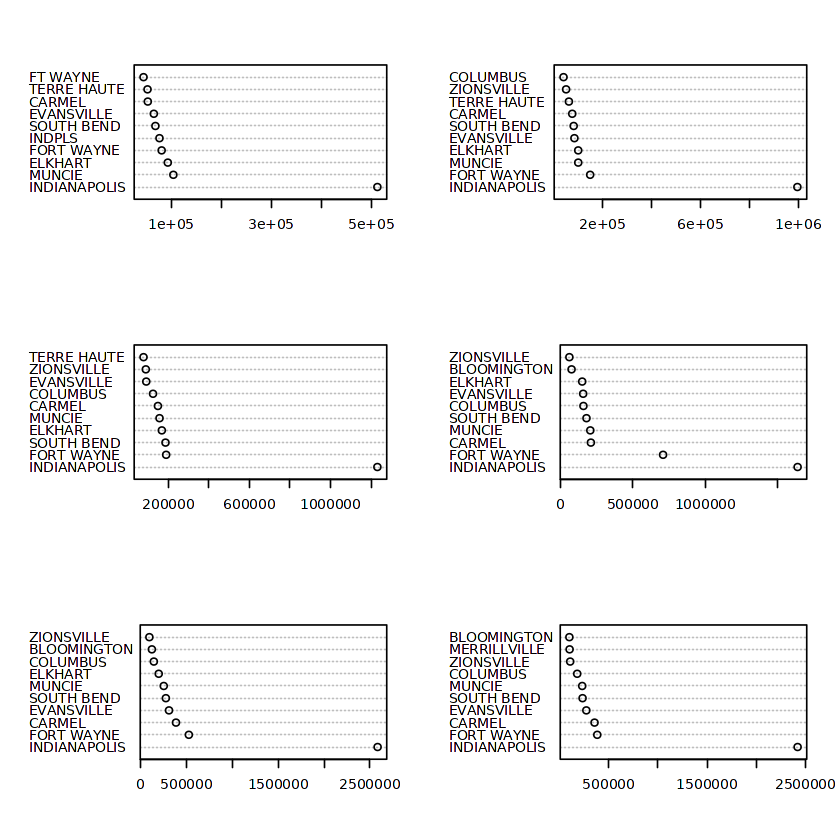

In [19]:
myresults <- lapply(seq(1984, 1994, by = 2), myindycities)
names(myresults) <- seq(1984, 1994, by = 2)
myresults

par(mfrow = c(3, 2))
sapply(myresults, function(x) dotchart(x))


I used lapply to apply the myindycities function to each even-numbered year from 1984 to 1994. I then named the results according to the years. After that, I set up a 3x2 plotting layout with par(mfrow = c(3, 2)) and used sapply to create a dotchart for each year's data. The dotcharts display the top cities for donations in each of those years.

## Question 5

In [30]:
bj_df <- fread( "/anvil/projects/tdm/data/icecream/bj/reviews.csv", select = "stars")
breyers_df <- fread("/anvil/projects/tdm/data/icecream/breyers/reviews.csv", select = "stars")
hd_df <- fread("/anvil/projects/tdm/data/icecream/hd/reviews.csv", select = "stars")
talenti_df <- fread("/anvil/projects/tdm/data/icecream/talenti/reviews.csv", select = "stars")

bj_avg <- mean(bj_df$stars, na.rm = TRUE)
breyers_avg <- mean(breyers_df$stars, na.rm = TRUE)
hd_avg <- mean(hd_df$stars, na.rm = TRUE)
talenti_avg <- mean(talenti_df$stars, na.rm = TRUE)

cat("Average Stars for BJ: ", bj_avg, "\n")
cat("Average Stars for Breyers: ", breyers_avg, "\n")
cat("Average Stars for HD: ", hd_avg, "\n")
cat("Average Stars for Talenti: ", talenti_avg, "\n")



Average Stars for BJ:  4.305804 
Average Stars for Breyers:  4.027961 
Average Stars for HD:  4.218475 
Average Stars for Talenti:  4.311624 


These are the average stars for each of the companies not using any functions.

In [32]:
myavgstars <- function(company) {
    myDF <- fread(paste0("/anvil/projects/tdm/data/icecream/", company, "/reviews.csv"), select = "stars")
    avg_stars <- mean(myDF$stars, na.rm = TRUE)
    return(avg_stars)
}

mycompanies <- c("bj", "breyers", "hd", "talenti")
average_stars <- sapply(mycompanies, myavgstars)
print(average_stars)


      bj  breyers       hd  talenti 
4.305804 4.027961 4.218475 4.311624 


I created a function called myavgstars that takes a company name as input. Inside the function, I used fread to read the company's review file and selected the "stars" column. I then calculated the average number of stars using the mean function, with na.rm = TRUE to exclude any missing values. After defining the function, I applied it to a vector of company names (mycompanies) using sapply. Finally, I printed the average stars for each company.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.